In [1]:
#import time, datetime
import numpy as np
#from numpy import zeros, sqrt, pi, vectorize
from numpy.linalg import pinv, inv
#from multiprocessing import Process, Queue
#import matplotlib
#matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
%matplotlib inline
#from error_analysis_class import *
#from noshellavg import *

import sys, os
sys.path.append('../src/')
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')
from discrete import *

%load_ext autoreload
%autoreload 2

In [319]:
cosmo = class_discrete_covariance(KMIN=0.001, KMAX = 10, n=20000, \
                                  RMIN = 0.001, RMAX = 200, n2 = 100, n_y = 50, \
                                  b = 2.0, f = 0.74, s=3.5, nn=3.0e-04, \
                                  rscale = 'lin', kscale='lin')

#cosmo.compile_fortran_modules()

# copy class to keep initial setting
#cosmo2 = cosmo
#cosmo2.MatterPower()

# calling matter power spectrum from camb
cosmo.MatterPower()
p_model0 = cosmo.multipole_P(0)
covp_model0 = cosmo.covariance_PP(0,0) 

In [320]:
p_model2 = cosmo.multipole_P(2)
p_model4 = cosmo.multipole_P(4)

In [321]:
kbin = cosmo.kcenter_y
PT = cosmo.multipole_P(0)
covp_model0 = cosmo.covariance_PP(0,0) 

In [322]:
kbin = cosmo.kcenter_y
PT = cosmo.multipole_P(0)

In [323]:
N_mock = 1000
#scale = np.fabs((PT)/2.) #
scale = PT/2. #np.sqrt(covp_model0.diagonal()) #PT/2.
loc = 0.0 #PT #np.sqrt(PT)
gr_RE = np.array([np.random.normal(loc=loc, scale=scale[i], size=N_mock) for i in range(kbin.size)]).T[0,:]
gr_IM = np.array([np.random.normal(loc=loc, scale=scale[i], size=N_mock) for i in range(kbin.size)]).T[0,:]
gr = np.sqrt( gr_RE**2 + gr_IM**2)

scale = PT/2. #np.sqrt(covp_model0.diagonal()) * PT #/2.
RePT = np.array([np.random.rayleigh(np.sqrt(scale[i]), size=N_mock) for i in range(kbin.size) ]).T#[0,:]
RePT_mean = np.mean(RePT, axis = 0)

In [324]:
N_mock = 10000
logP = np.log(PT)
sigmap = np.sqrt(covp_model0.diagonal())
scale = sigmap* 1./(PT) #+1./cosmo.nn)
logPmocks = np.array([np.random.normal(loc=logP[i], scale=scale[i], size=N_mock) for i in range(kbin.size)], dtype=np.float128).T
logPmocks_mean = np.mean(logPmocks, axis = 0)
logPmocks_std = np.std(logPmocks, axis = 0)

#Pmocks_mean = np.exp(logPdist_mean)
Pmocks = np.array([np.exp(logPmocks[i]) for i in range(N_mock)], dtype=np.float128)
Pmocks_mean = np.mean(Pmocks, axis = 0)


In [325]:
#meanvalue = PT/2.
#modevalue = np.sqrt(2 / np.pi) * meanvalue

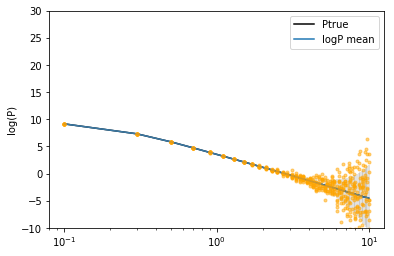

In [326]:
fig, ax = plt.subplots()
ax.plot(kbin, logP, 'k-', label='Ptrue')
ax.errorbar(kbin, logP, yerr =scale, color = 'grey', alpha = 0.3)
#ax.loglog(kbin, gr_IM.ravel(), '.')
#ax.loglog(kbin, gr.ravel(), label='two Gauss')
#ax.loglog(kbin, (RePT_mean)**2, label = 'Rayleigh')
ax.plot(kbin, logPmocks_mean, label = 'logP mean')
for i in range(10): ax.plot(kbin, logPmocks[i], marker='.', ls ='', color = 'orange', alpha = 0.5)


ax.legend()
ax.set_xscale('log')
ax.set_ylim(-10, 30)
ax.set_ylabel('log(P)')

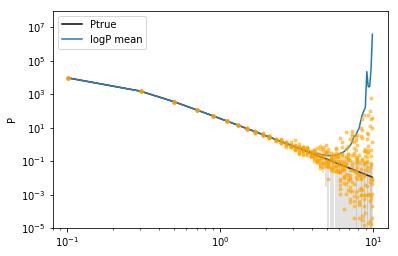

In [333]:
fig, ax = plt.subplots()
ax.loglog(kbin, p_model0, 'k-', label='Ptrue')
ax.errorbar(kbin, p_model0, yerr =sigmap, color = 'grey', alpha = 0.3)
#ax.loglog(kbin, gr_IM.ravel(), '.')
#ax.loglog(kbin, gr.ravel(), label='two Gauss')
#ax.loglog(kbin, (RePT_mean)**2, label = 'Rayleigh')
ax.loglog(kbin, Pmocks_mean, label = 'logP mean')
for i in range(10): ax.loglog(kbin, Pmocks[i], marker='.', ls ='', color = 'orange', alpha = 0.5)


ax.legend()
ax.set_yscale('log')
ax.set_ylim(1e-05, 1e+08)

ax.set_ylabel('P')

In [328]:
Pmocks_std = np.std(Pmocks, axis = 0)

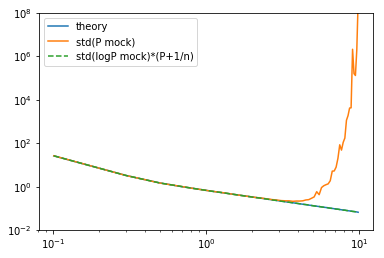

In [329]:
fig, ax = plt.subplots()
ax.loglog(kbin, sigmap, label='theory')
ax.loglog(kbin, Pmocks_std, '-', label = 'std(P mock)')
ax.loglog(kbin, logPmocks_std*(PT), '--', label='std(logP mock)*(P+1/n)')
ax.set_ylim(1e-02, 1e+08)

ax.legend()

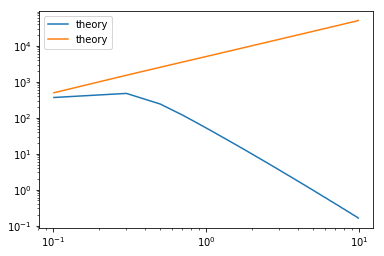

In [330]:
fig, ax = plt.subplots()
ax.loglog(kbin, PT/sigmap, label='theory')
ax.loglog(kbin, (PT+1./cosmo.nn)/sigmap, label='theory')
#ax.loglog(kbin, Pmocks_std, '-', label = 'std(P mock)')
#ax.loglog(kbin, logPmocks_std*(PT), '--', label='std(logP mock)*(P+1/n)')
#ax.set_ylim(1e-02, 1e+08)

ax.legend()

In [331]:
cosmo.dk_y

0.19998000000000002

In [318]:
cosmo.kbin_y

array([1.0000e-03, 1.6675e+00, 3.3340e+00, 5.0005e+00, 6.6670e+00,
       8.3335e+00, 1.0000e+01])